# SIBUR competition

In [1]:
# Импорт нужных библиотек и настройка глобальных параметров ноутбука
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import holoviews as hv
import bokeh
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 500)
plt.rcParams['figure.figsize'] = (10,3)

targets = ['target', 'target2', 'target3', 'target4', 'target5']

In [2]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import TimeSeriesSplit

def validation_score(val_data, predicted):
    tscv = TimeSeriesSplit(n_splits=10)
    scores=[]
    for train_ind, test_ind in tscv.split(val_data):
        pred = predicted.iloc[test_ind]

        score = MSE(val_data.iloc[test_ind], pred)**0.5
        scores.append(score)
        print('train len: ', len(train_ind), '\t till ', val_data.index[train_ind[-1]]  ,'\t score: ' , score)

    print('average score: ', np.mean(scores))
    return np.mean(scores)

In [3]:
# 1. read raw data
sensors = pd.read_csv('data/sensors.csv', parse_dates=['timestamp'], index_col='timestamp')
coke = pd.read_csv('data/coke_target.csv', parse_dates=['timestamp'], index_col='timestamp')
reactor_pressure = pd.read_csv('data/reactor_pressure_target.csv', parse_dates=['timestamp'], index_col='timestamp')

temp_on_he = pd.read_csv('data/temp_on_he_target.csv', parse_dates=['timestamp'], index_col='timestamp')
pressure_he = pd.read_csv('data/pressure_he_target.csv', parse_dates=['timestamp'], index_col='timestamp')
activity = pd.read_csv('data/activity_target.csv', parse_dates=['timestamp'], index_col='timestamp')

reactor_pressure.columns = ['target2']
temp_on_he.columns = ['target3']
pressure_he.columns = ['target4']
activity.columns = ['target5']

#print (sensors.info(), '\n')
#print (coke.info())

In [4]:
# 2. merge to one dataframe
merged_df = pd.merge(sensors, coke, on='timestamp', how='outer')
merged_df = pd.merge(merged_df, reactor_pressure, on='timestamp', how='outer')
merged_df = pd.merge(merged_df, temp_on_he, on='timestamp', how='outer')
merged_df = pd.merge(merged_df, pressure_he, on='timestamp', how='outer')
merged_df = pd.merge(merged_df, activity, on='timestamp', how='outer')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13272 entries, 2016-10-24 16:00:00 to 2018-04-30 15:00:00
Data columns (total 53 columns):
f_0        584 non-null float64
f_1        576 non-null float64
f_2        580 non-null float64
f_3        13241 non-null float64
f_4        13084 non-null float64
f_5        13266 non-null float64
f_6        13260 non-null float64
f_7        13244 non-null float64
f_8        13266 non-null float64
f_9        13266 non-null float64
f_10       13266 non-null float64
f_11       13266 non-null float64
f_12       13266 non-null float64
f_13       13266 non-null float64
f_14       13266 non-null float64
f_15       13266 non-null float64
f_16       13266 non-null float64
f_17       13266 non-null float64
f_18       13266 non-null float64
f_19       13266 non-null float64
f_20       13266 non-null float64
f_21       13178 non-null float64
f_22       13266 non-null float64
f_23       13267 non-null float64
f_24       13266 non-null float64
f_25       1

In [5]:
# split to train and test data
train = merged_df[:'2017-12-31 23:00:00'].fillna(method='ffill').fillna(0)
test = merged_df.drop(targets, axis=1).fillna(method='ffill').dropna()['2018-01-01':]

In [6]:
width = 490
height = 200
df = train
graph1 = df.f_0.hvplot(width = width, height = height) + df.target3.hvplot(width = width, height = height) + \
        df.target.hvplot(width = width, height = height) + df.target4.hvplot(width = width, height = height) + \
        df.target2.hvplot(width = width, height = height) + df.target5.hvplot(width = width, height = height)
graph1.cols(2)

:Layout
   .Curve.F_0     :Curve   [timestamp]   (f_0)
   .Curve.Target3 :Curve   [timestamp]   (target3)
   .Curve.Target  :Curve   [timestamp]   (target)
   .Curve.Target4 :Curve   [timestamp]   (target4)
   .Curve.Target2 :Curve   [timestamp]   (target2)
   .Curve.Target5 :Curve   [timestamp]   (target5)

C:\Progs\Anaconda2\envs\Tensor\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


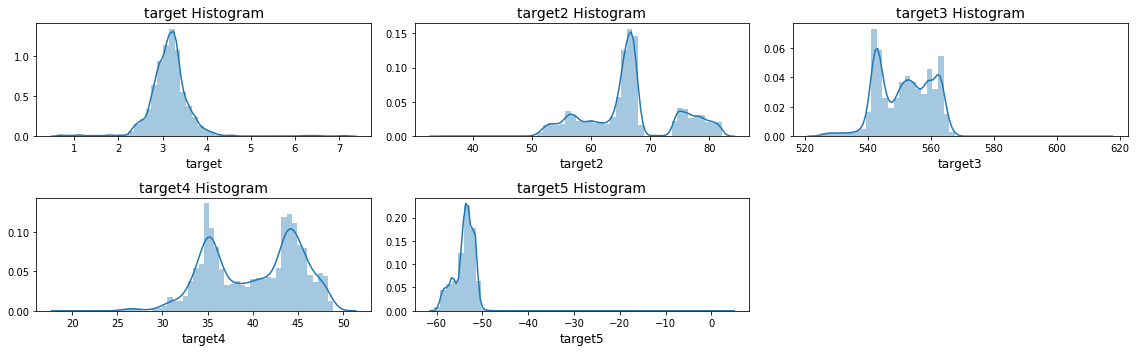

In [7]:
plt.figure(figsize=(16,5))
for i, tar in enumerate(targets):
    sns.distplot(df[tar].values, bins=50, kde=True, ax = plt.subplot(2, 3, i+1))
    plt.xlabel(tar, fontsize=12)
    plt.title(tar + ' Histogram', fontsize=14)

plt.tight_layout()
plt.show()

In [8]:
train.describe()

f_0           f_1           f_2           f_3           f_4  \
count  10400.000000  10400.000000  10400.000000  10400.000000  10400.000000   
mean      99.068325      0.240136     26.404957      0.089542      2.995086   
std        1.987697      0.109688      2.794402      1.460706      3.865860   
min        0.000000      0.000000      0.000000     -0.049504     -0.089998   
25%       99.004606      0.193783     26.021703     -0.007559      0.532627   
50%       99.168132      0.244712     26.652086      0.000945      2.487767   
75%       99.289177      0.291343     27.192505      0.010280      4.409330   
max       99.869165      1.187318     45.258448     82.550710     27.760967   

                f_5           f_6           f_7            f_8            f_9  \
count  10400.000000  10400.000000  10400.000000   10400.000000   10400.000000   
mean       0.027157      0.315644      4.779121  217040.769331  218824.329665   
std        0.292438      0.474183      9.152470   38843.968178   39153.865434   
min       -0.081726     -0.155299    -13.312292   -2000.516934   -1820.834828   
25%       -0.013048     -0.006239      0.549148  213131.907513  214928.816373   
50%        0.002358      0.037836      3.750713  228576.571130  230571.226891   
75%        0.019335      0.698536      7.025487  235169.805769  237093.523480   
max       13.553216     10.395604     81.970334  238737.472308  240090.823170   

                f_10          f_11          f_12          f_13          f_14  \
count   10400.000000  10400.000000  10400.000000  10400.000000  10400.000000   
mean   216630.268678   9781.977515   9721.221422   9979.389661     49.909587   
std     38742.055013   1931.803447   1929.867462   1964.726693     10.817331   
min     -2207.501108   -163.873745   -166.952597   -158.217016     -9.099631   
25%    212967.154445   9785.243481   9691.215446   9972.931734     46.398475   
50%    228137.469352  10332.944789  10294.103282  10543.492608     51.731090   
75%    234676.817755  10484.245474  10418.100277  10703.331129     56.199951   
max    238937.073775  13523.195818  13465.726415  13492.581538     69.164315   

               f_15          f_16          f_17          f_18          f_19  \
count  10400.000000  10400.000000  10400.000000  10400.000000  10400.000000   
mean     117.194029    126.425373     41.582123    104.809982    126.152812   
std       21.064843     22.750097      7.721134     18.449702     23.544224   
min       -1.090329     -1.592890     -0.472611     -0.417572     -1.787298   
25%      118.393983    130.634878     41.870787    106.329767    130.549846   
50%      120.673674    130.991958     42.068631    108.855188    130.961909   
75%      123.318294    131.335051     42.579106    109.144693    131.350767   
max      131.791709    132.991788     46.794966    110.235765    136.398087   

               f_20          f_21          f_22          f_23          f_24  \
count  10400.000000  10400.000000  10400.000000  10400.000000  10400.000000   
mean     633.701815    624.563016     40.864007    104.483959    126.317529   
std       48.908097    104.641982      7.481875     18.622655     23.142261   
min      393.556898      2.123765     -0.286598     -2.201357     -0.916256   
25%      643.639558    644.320485     41.903921    106.655478    130.673023   
50%      644.507174    645.812652     42.023825    108.322320    130.972897   
75%      645.305525    647.161903     42.258097    109.212416    131.251672   
max      658.672208    653.394876     44.403314    111.862225    180.968625   

               f_25          f_26          f_27          f_28          f_29  \
count  10400.000000  10400.000000  10400.000000  10400.000000  10400.000000   
mean     626.847711     39.242628    104.814705    618.173858    610.779349   
std      105.768387      7.343551     18.855371     45.572762    102.633061   
min        2.351833     -0.278215     -7.027282    385.602890      2.227581   
25%      647.522166     40.129677 

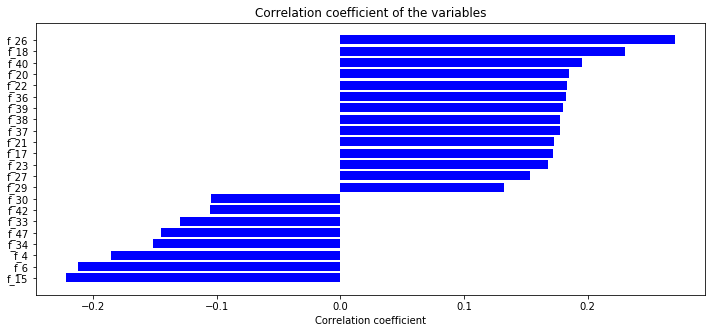

In [9]:
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings("ignore")

labels = []
values = []
for col in df.drop(targets, axis=1).columns:
    labels.append(col)
    values.append(spearmanr(df[col].values, df['target'].values)[0])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
 
corr_df = corr_df[(corr_df['corr_values']>0.1) | (corr_df['corr_values']<-0.1)]
ind = np.arange(corr_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,5))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='b')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

correlated_features = corr_df.col_labels.tolist()

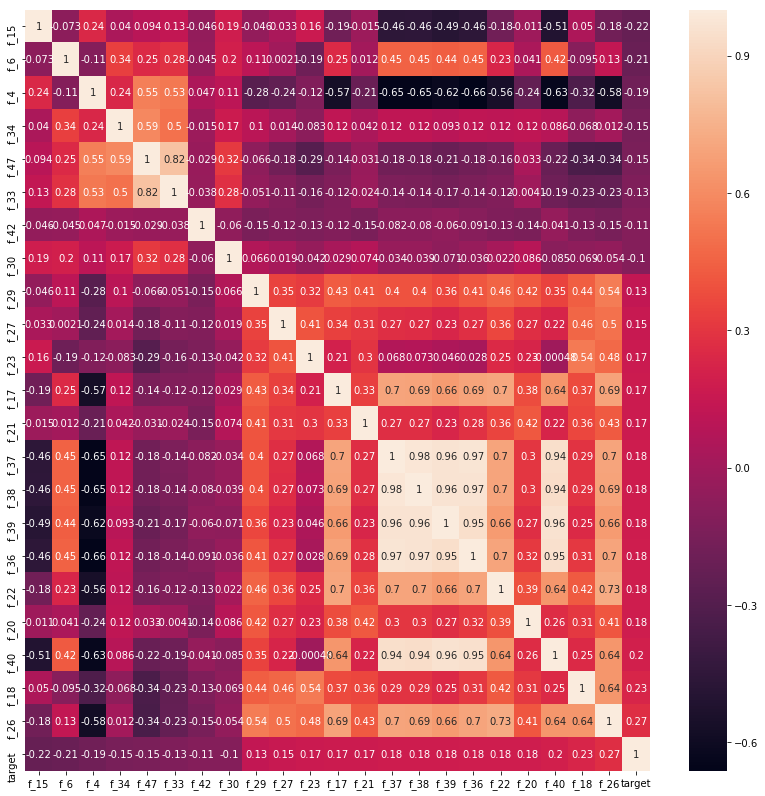

In [10]:
correlated_features = corr_df.col_labels.tolist()
correlated_features.append('target')

f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df[correlated_features].corr('spearman'), annot=True)

Now lets predict mean average value for target on test data

In [15]:
#common_df = pd.concat([train, test])
train['target_pred'] = train.target.mean()
test['target_pred'] = train.target.mean()
pred_df = pd.DataFrame(pd.concat([train.target, test.target_pred]), columns=['target'])
pred_df['rolling_mean'] = train['target_pred']
pred_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

In [16]:
validation_score(train['target'], train['target_pred'])

train len:  950 	 till  2016-12-03 05:00:00 	 score:  0.48032385769522057
train len:  1895 	 till  2017-01-11 14:00:00 	 score:  0.5229160879648205
train len:  2840 	 till  2017-02-19 23:00:00 	 score:  0.40199873686926874
train len:  3785 	 till  2017-03-31 08:00:00 	 score:  0.7445946318326533
train len:  4730 	 till  2017-05-09 17:00:00 	 score:  0.2512101899203768
train len:  5675 	 till  2017-06-18 02:00:00 	 score:  0.21629209652223164
train len:  6620 	 till  2017-07-27 11:00:00 	 score:  0.30033296121060793
train len:  7565 	 till  2017-09-04 20:00:00 	 score:  0.9989284488212056
train len:  8510 	 till  2017-10-14 05:00:00 	 score:  0.24519272610888684
train len:  9455 	 till  2017-11-22 14:00:00 	 score:  0.24882885553579714
average score:  0.4410618592481069


0.4410618592481069

In [17]:
# Making a submission file #
sub_df = pred_df['2018':]
#sub_df['target_pred'] = pred

print('Submision length: ', len(sub_df))
sub_df['target'].to_csv("baseline_mean_average.csv", index=True, header=True)

# 0.5144 оценка  RMSE
# 0.4410618592481069 - my validation

Submision length:  2872


In [18]:
# using xgboost on raw data without adding any features
from sklearn.ensemble import GradientBoostingRegressor

tscv = TimeSeriesSplit(n_splits=10)
gbr = GradientBoostingRegressor()

X_train = df.drop(targets, axis=1)
y_train = df[targets[0]]
scores=[]
full_prediction = []
for train_ind, test_ind in tscv.split(X_train):
    used_indexes = len(train_ind) + len(test_ind)
    gbr.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
    pred = gbr.predict(X_train.iloc[test_ind])
    
    # for drawing prediction
    full_prediction.append(np.concatenate([y_train[train_ind], pred, np.zeros(len(X_train) - used_indexes)]))
    
    score = MSE(y_train.iloc[test_ind], pred)**0.5
    scores.append(score)
    print('train len: ', len(train_ind), '\t till ', X_train.index[train_ind[-1]]  ,'\t score: ' , score)

print('average score: ', np.mean(scores))

train len:  950 	 till  2016-12-03 05:00:00 	 score:  0.39516634826116337
train len:  1895 	 till  2017-01-11 14:00:00 	 score:  0.7355217995448164
train len:  2840 	 till  2017-02-19 23:00:00 	 score:  0.4581847095568834
train len:  3785 	 till  2017-03-31 08:00:00 	 score:  0.982876359775064
train len:  4730 	 till  2017-05-09 17:00:00 	 score:  0.2915092729806495
train len:  5675 	 till  2017-06-18 02:00:00 	 score:  0.3418119401777355
train len:  6620 	 till  2017-07-27 11:00:00 	 score:  0.30994284203952044
train len:  7565 	 till  2017-09-04 20:00:00 	 score:  0.99985869603134
train len:  8510 	 till  2017-10-14 05:00:00 	 score:  0.3663042602382288
train len:  9455 	 till  2017-11-22 14:00:00 	 score:  0.2934169530010657
average score:  0.5174593181606466


In [20]:
pred_df = pd.DataFrame(full_prediction[9], index=X_train.index)
pred_df.hvplot() * y_train.hvplot() * train.target_pred.hvplot()

:Overlay
   .Curve.I           :Curve   [timestamp]   (0)
   .Curve.Target      :Curve   [timestamp]   (target)
   .Curve.Target_pred :Curve   [timestamp]   (target_pred)

boosting cant beat baseline!